In [95]:
from sequitur.models import LINEAR_AE, LSTM_AE
import torch
from sequitur import quick_train
import pickle
import matplotlib.pyplot as plt

with open('/Users/rohansanda/Desktop/cs229_proj/data/test3_rs_segments.pickle', 'rb') as f:
    segments = pickle.load(f)

num_samples = 100

train_segs = segments[0:num_samples, :]
# train_segs = [s.reshape(200, 1) for s in train_segs]
print(train_segs.shape)
train_segs_tensor = [torch.tensor(s).float() for s in train_segs]

train_set = train_segs_tensor # [torch.randn(200, 1) for _ in range(100)]
encoder, decoder, encodings, losses = quick_train(LSTM_AE, train_set, encoding_dim=45, h_dims=[64], epochs=10, verbose=True)


(100, 200)


/Users/rohansanda/miniconda3/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/Users/rohansanda/miniconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Loss: 28125.148391113282
Epoch: 2, Loss: 3233.8822232055663
Epoch: 3, Loss: 3089.9570602416993
Epoch: 4, Loss: 3043.5387559509277
Epoch: 5, Loss: 3005.065926818848
Epoch: 6, Loss: 2965.0714239501954
Epoch: 7, Loss: 2919.374672241211
Epoch: 8, Loss: 2900.035557098389
Epoch: 9, Loss: 2830.375630645752
Epoch: 10, Loss: 2726.3332623291017


In [96]:
print(f"encodings length: {len(encodings)} and num_samples: {num_samples}")
assert(len(encodings) == num_samples)

encodings length: 100 and num_samples: 100


In [98]:
train_segs.shape

(100, 200)

In [107]:
train_segs[0:num_samples, :].shape

(100, 200)

In [108]:
#train_segs = segments[1, :]
#train_segs.shape
# train_segs = [s.reshape(200, 1) for s in train_segs]
# print(train_segs[0].shape)
input = torch.tensor(train_segs).float()

In [109]:
z = encoder(input)
x_prime = decoder(z, seq_len=num_samples)
z.shape

torch.Size([45])

In [110]:
x_prime.shape

torch.Size([100, 200])

In [111]:
x_numpy = x_prime.detach().numpy()
x_numpy.shape

(100, 200)

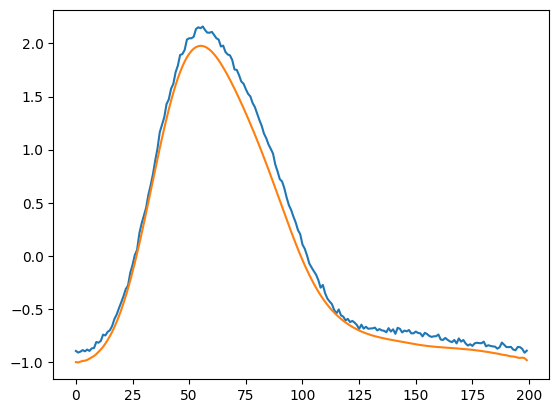

In [92]:
plt.plot(x_numpy[100,:])
plt.plot(segments[1, :])